# Solution to the Travelling Broker Problem

### Exercises 1 to 5

In [12]:
def distance_between_buildings(buildings, i, j):
    return ((buildings[i][0] - buildings[j][0])**2 + (buildings[i][1] - buildings[j][1])**2)**0.5

In [13]:
def greedy_path(buildings, i):

    # Start the path at the starting building
    path = [i]

    # Expand the path building by building
    for _ in range(len(buildings) - 1):

        # Calculate distances to all other unvisited buildings
        other_buildings = set(range(len(buildings))).difference(path)
        distances = {distance_between_buildings(buildings, path[-1], j): j for j in other_buildings}

        # Pick the city that's nearest
        min_distance = min(distances.keys())
        closest_building = distances[min_distance]
        path.append(closest_building)
        
    return path + [i]

In [14]:
def path_distance(buildings, path):
    
    # Initial distance 
    distance = 0
    
    for p in range(len(path)-1):
        distance += distance_between_buildings(buildings, path[p], path[p+1])

    return distance

In [15]:
def shortest_path(buildings, paths):
    
    # Find the distance taken by all paths
    distances = [path_distance(buildings, path) for path in paths]
    
    # Find the smallest distance
    min_distance = min(distances)
    for idx, distance in enumerate(distances):
        if distance == min_distance:
            break
            
    # Return the path
    return paths[idx]

In [24]:
def solution(buildings):
    
    paths = [greedy_path(buildings, i) for i in range(len(buildings))]
    return shortest_path(buildings, paths)

### Complete solutions, first iteration ( for reference only )

In [16]:
from itertools import permutations

def exact_solution(cities):
    
    def distance(x, y):
        return ((cities[x][0] - cities[y][0])**2 + (cities[x][1] - cities[y][1])**2)**0.5

    # Define all possible paths we can take
    incomplete_paths = list(permutations(range(len(cities))))
    complete_paths = [list(path) + [path[0]] for path in incomplete_paths]

    
    distances = []
    for path in complete_paths:
        dist = 0
        for i in range(len(path)-1):
            dist += distance(path[i], path[i+1])
        distances.append(dist)


    # Find the minimum distance
    minimum_distance = min(distances)

    for idx in range(len(distances)):
        if distances[idx] == minimum_distance:
            break


    # Shortest path :
    shortest_path = complete_paths[idx]
    
    return shortest_path

In [17]:
# Generate a greedy path starting from each node

def greedy_solution(cities):
    
    def distance(x, y):
        return ((cities[x][0] - cities[y][0])**2 + (cities[x][1] - cities[y][1])**2)**0.5
    
    
    complete_paths = []

    # Create a single path, one per starting city
    for i in range(len(cities)):

        # The path starts at the starting city
        path = [i]

        # Expand the path city by city
        for _ in range(len(cities)-1):

            # Calculate distances to all other cities
            other_cities = set(range(len(cities))).difference(path)
            distances = {distance(path[-1], j): j for j in other_cities}

            # Pick the city that's nearest
            min_distance = min(distances.keys())
            closest_city = distances[min_distance]
            path.append(closest_city)

        complete_paths.append(path + [i])
        
    
    # Iterate through the paths created and find the shortest
    distances = []
    for path in complete_paths:
        dist = 0
        for i in range(len(path)-1):
            dist += distance(path[i], path[i+1])
        distances.append(dist)


    # Find the minimum distance
    minimum_distance = min(distances)

    for idx in range(len(distances)):
        if distances[idx] == minimum_distance:
            break
            

    # Shortest path :
    shortest_path = complete_paths[idx]
    
    return shortest_path

### Evaluating a solution

In [92]:
def evaluate_solution(solution, cities, silent=False):

    def distance(x, y):
        return ((cities[x][0] - cities[y][0])**2 + (cities[x][1] - cities[y][1])**2)**0.5
    
    if isinstance(cities, int):
        cities = np.random.rand(cities, 2)
    
    # Run solution
    start = time()
    user_path = solution(cities)
    end = time()
    
    # Ensure it visits all cities once and then returns to the starting city
    assert len(set(user_path)) == len(user_path) - 1
    assert user_path[0] == user_path[-1]
    
    # Find the optimal solution
    optimal_path = exact_solution(cities)
    
    # Calculate distances for both solutions
    user_distance = sum([distance(user_path[i], user_path[i+1]) for i in range(len(user_path)-1)])
    optimal_distance = sum([distance(optimal_path[i], optimal_path[i+1]) for i in range(len(optimal_path)-1)])
    
    if not silent:
        
        print("Your solution is {:.1f}% optimal.".format(100 * optimal_distance / user_distance))
        print("Your solution took {} seconds.".format(end - start))
        
        plt.scatter(cities[:, 0], cities[:, 1])
        for i in range(len(user_path)-1):
            plt.plot([cities[user_path[i]][0], cities[user_path[i+1]][0]], 
                     [cities[user_path[i]][1], cities[user_path[i+1]][1]], "k")

    return cities, optimal_path 

In [98]:
# Data generation

for i in range(1):
    cities, optimal_path = evaluate_solution(solution, 11, silent=True)
    X.append(cities)
    Y.append(optimal_path)
    
with open("/Users/qcaudron/Apps/travelling_broker/data.json", "w") as f:
    data = json.dump({"buildings": [x.tolist() for x in X], "optimal_path": Y}, f)

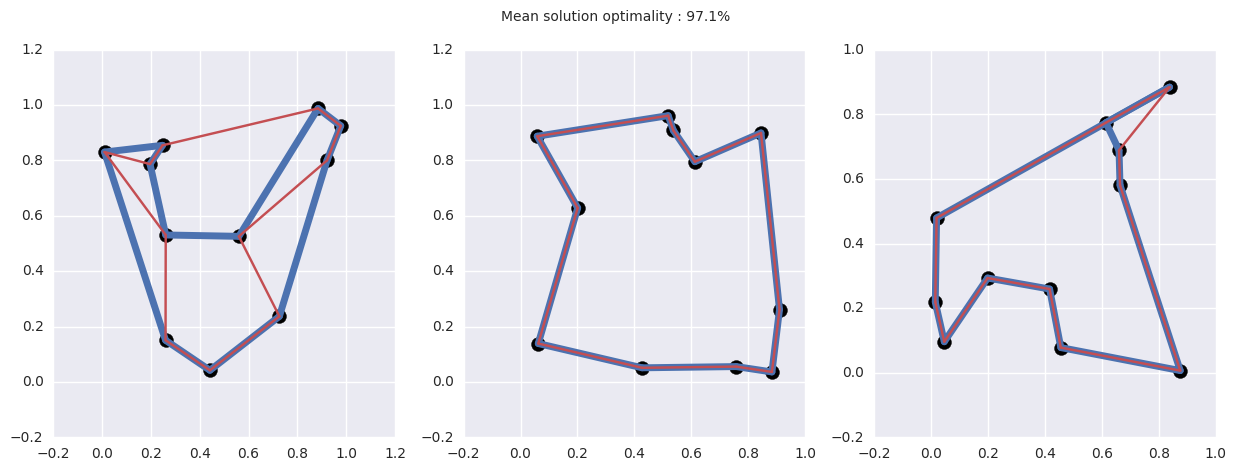

In [101]:
import json
from time import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Pull in exact solutions
with open("/Users/qcaudron/Apps/travelling_broker/data.json", "r") as f:
    data = json.load(f)
    buildings = data["buildings"]
    optimal_paths = data["optimal_path"]

# Calculate path distances
user_paths = [solution(building) for building in buildings]
user_distances = [path_distance(building, path) for building, path in zip(buildings, user_paths)]
optimal_distances = [path_distance(building, path) for building, path in zip(buildings, optimal_paths)]

optimality = np.array(optimal_distances) / np.array(user_distances)

# Visualisations
C = sns.color_palette("deep", 8)
plt.figure(figsize=(15, 5))
plt.suptitle("Mean solution optimality : {:.1f}%".format(100 * optimality.mean()));

for i in range(1, 4):
    plt.subplot(1, 3, i)
    building = np.array(buildings[-i])
    user_path = user_paths[-i]
    optimal_path = optimal_paths[-i]
    for i in range(len(user_path)-1):
        plt.plot([building[user_path[i]][0], building[user_path[i+1]][0]], 
                 [building[user_path[i]][1], building[user_path[i+1]][1]], c=C[0], lw=5, label="User solution")
    for i in range(len(optimal_path)-1):
        plt.plot([building[optimal_path[i]][0], building[optimal_path[i+1]][0]], 
                 [building[optimal_path[i]][1], building[optimal_path[i+1]][1]], c=C[2], label="User solution")
    plt.scatter(building[:, 0], building[:, 1], s=100, color="k")